<a href="https://colab.research.google.com/github/hanadinh1203/Data-Analytics-/blob/main/Predictive_Modeling_Car_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset used in this Predictive Model is from "Traffic Accidents" dataset (https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents).

Columns' description:

- crash_date: The date the accident occurred.]
- traffic_control_device: The type of traffic control device involved (e.g., traffic light, sign).
- weather_condition: The weather conditions at the time of the accident.
- lighting_condition: The lighting conditions at the time of the accident.
- first_crash_type: The initial type of the crash (e.g., head-on, rear-end).
- trafficway_type: The type of roadway involved in the accident (e.g., highway, local road).
- alignment: The alignment of the road where the accident occurred (e.g., straight, curved).
- roadway_surface_cond: The condition of the roadway surface (e.g., dry, wet, icy).
- road_defect: Any defects present on the road surface.
- crash_type: The overall type of the crash.
- intersection_related_i: Whether the accident was related to an intersection.
- damage: The extent of the damage caused by the accident.
- prim_contributory_cause: The primary cause contributing to the crash.
- num_units: The number of vehicles involved in the accident.
- most_severe_injury: The most severe injury sustained in the crash.
- injuries_total: The total number of injuries reported.
- injuries_fatal: The number of fatal injuries resulting from the accident.
- injuries_incapacitating: The number of incapacitating injuries.
- injuries_non_incapacitating: The number of non-incapacitating injuries.
- injuries_reported_not_evident: The number of injuries reported but not visibly evident.
- injuries_no_indication: The number of cases with no indication of injury.
- crash_hour: The hour the accident occurred.
- crash_day_of_week: The day of the week the accident occurred.
- crash_month: The month the accident occurred.

# **Load necessary libraries and explore the dataset.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/JA/RACQ/traffic_accidents.csv')
cols_needed = [
    "crash_date", "damage", "traffic_control_device", "weather_condition",
    "lighting_condition", "first_crash_type", "trafficway_type", "alignment",
    "roadway_surface_cond", "road_defect", "crash_type",
    "intersection_related_i", "prim_contributory_cause", "most_severe_injury"
]
df[cols_needed]

,crash_date,damage,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,prim_contributory_cause,most_severe_injury
0,07/29/2023 01:00:00 PM,"$501 - $1,500",TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,UNABLE TO DETERMINE,NO INDICATION OF INJURY
1,08/13/2023 12:11:00 AM,"OVER $1,500",TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,IMPROPER TURNING/NO SIGNAL,NO INDICATION OF INJURY
2,12/09/2021 10:30:00 AM,"$501 - $1,500",TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,FOLLOWING TOO CLOSELY,NO INDICATION OF INJURY
3,08/09/2023 07:55:00 PM,"OVER $1,500",TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,UNABLE TO DETERMINE,NONINCAPACITATING INJURY
4,08/19/2023 02:55:00 PM,"$501 - $1,500",TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,"OVER $1,500",UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,Y,UNABLE TO DETERMINE,NO INDICATION OF INJURY
209302,07/18/2023 02:10:00 PM,"OVER $1,500",UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,IMPROPER OVERTAKING/PASSING,NO INDICATION OF INJURY
209303,10/23/2019 01:32:00 PM,$500 OR LESS,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,N,RELATED TO BUS STOP,INCAPACITATING INJURY
209304,06/01/2020 03:23:00 PM,$500 OR LESS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",NONINCAPACITATING INJURY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [5]:
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [6]:
df.isnull()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df["crash_date"] = pd.to_datetime(df["crash_date"], format="%m/%d/%Y %I:%M:%S %p")
df["crash_hour"] = df["crash_date"].dt.hour  # Extract hour
df["crash_day_of_week"] = df["crash_date"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["crash_month"] = df["crash_date"].dt.month  # Extract month
df["is_weekend"] = df["crash_date"].dt.dayofweek >= 5  # Weekend indicator (Saturday & Sunday)
df.head(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,is_weekend
0,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,13,5,7,True
1,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0,6,8,True
2,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,10,3,12,False
3,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,5.0,0.0,0.0,5.0,0.0,0.0,19,2,8,False
4,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,3.0,14,5,8,True


# **Preprocess and Encode Data**

In [8]:
categorical_cols = [
    "traffic_control_device", "weather_condition", "lighting_condition",
    "first_crash_type", "trafficway_type", "alignment", "roadway_surface_cond",
    "road_defect", "crash_type", "intersection_related_i", "damage",
    "prim_contributory_cause", "most_severe_injury"
]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Encode categorical features using LabelEncoder
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# **Predictive Modelling**

In [9]:
X = df.drop(["damage", "crash_date"], axis=1)
y = df["damage"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm transformations
print("Data preprocessing completed successfully!")

Data preprocessing completed successfully!


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35      4138
           1       0.35      0.13      0.19      8301
           2       0.74      0.92      0.82     29423

    accuracy                           0.70     41862
   macro avg       0.53      0.44      0.45     41862
weighted avg       0.64      0.70      0.65     41862

Accuracy: 0.6999187807558167


In [11]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.56      0.33      0.42      4138
           1       0.45      0.00      0.01      8301
           2       0.73      0.97      0.83     29423

    accuracy                           0.72     41862
   macro avg       0.58      0.44      0.42     41862
weighted avg       0.66      0.72      0.63     41862

Accuracy: 0.7189814151258899


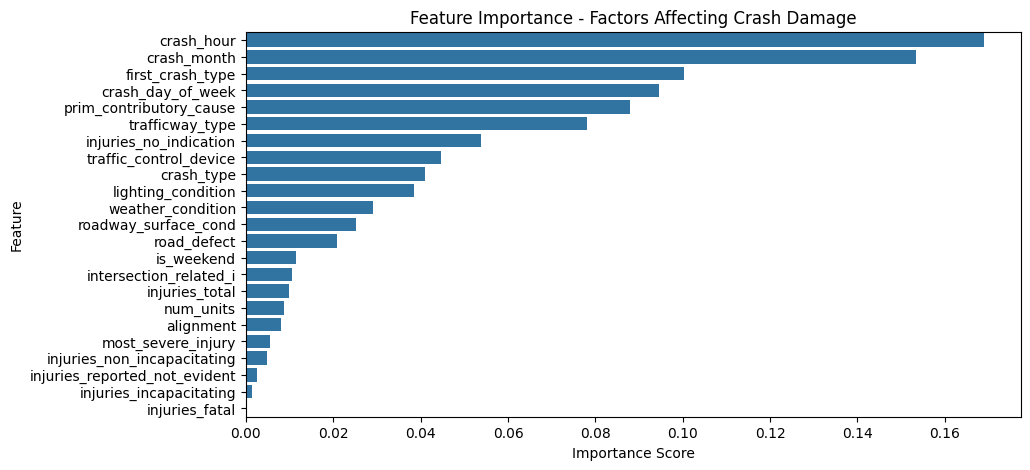

In [12]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Factors Affecting Crash Damage")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**Conclusion:**

The models are effective in identifying crashes that result in high damage (class 2), which are likely the most critical events from a cost and risk perspective.

The lower performance on class 0 and class 1 indicates that these events are either less well-represented in the data or have features that are more subtle, suggesting a need for further data balancing, feature engineering, or model tuning if precise prediction for these classes is required.

Temporal Factors (Crash Hour and Month):
These insights suggest that certain times of day and months are associated with more severe crashes. This could be due to factors like traffic volume, lighting conditions, or weather patterns.

Crash Characteristics (First Crash Type):
Knowing that the type of crash is a key determinant of damage severity means that different crash scenarios can be prioritized for intervention based on their historical risk profiles.


# **Time Series Forecasting**

In [13]:
!pip install pandas matplotlib prophet
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [26]:
df_prophet = df.reset_index()[["crash_date", "damage"]]
df_prophet.columns = ["ds", "y"]
model = Prophet()
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz229t61/cn_2xhwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz229t61/5cp1new6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97494', 'data', 'file=/tmp/tmpzz229t61/cn_2xhwn.json', 'init=/tmp/tmpzz229t61/5cp1new6.json', 'output', 'file=/tmp/tmpzz229t61/prophet_modell113wz7a/prophet_model-20250205013011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:30:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:31:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future = model.make_future_dataframe(periods=30)  # Forecast for 30 days
forecast = model.predict(future)

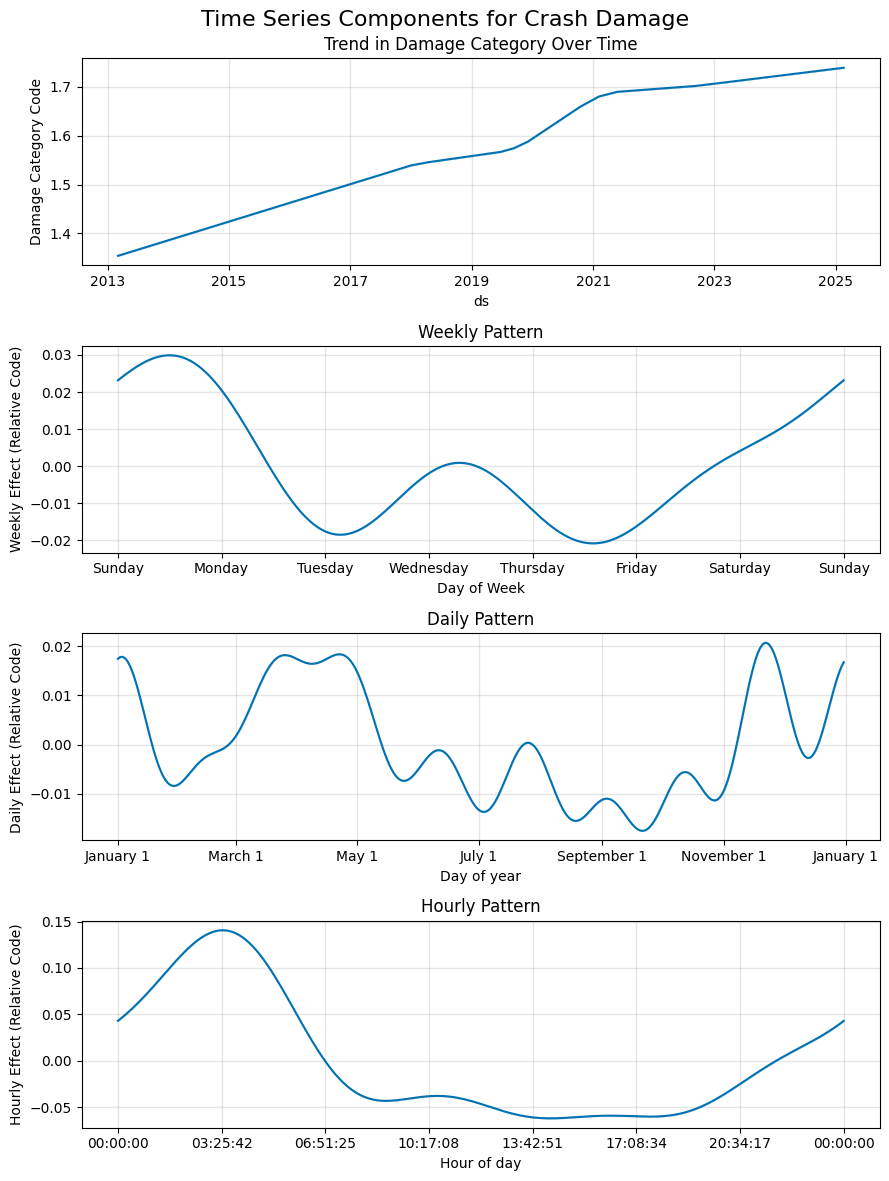

In [31]:
fig_components = model.plot_components(forecast)
axes = fig_components.get_axes()  # returns a list of Axes objects

# Typically, Prophet’s components are in separate subplots:
# axes[0] -> trend
# axes[1] -> weekly
# axes[2] -> yearly or daily, etc.

# Adjust titles and labels for each subplot
axes[0].set_title("Trend in Damage Category Over Time")
axes[0].set_ylabel("Damage Category Code")

axes[1].set_title("Weekly Pattern")
axes[1].set_ylabel("Weekly Effect (Relative Code)")

if len(axes) > 2:
    axes[2].set_title("Daily Pattern")
    axes[2].set_ylabel("Daily Effect (Relative Code)")
    axes[3].set_title("Hourly Pattern")
    axes[3].set_ylabel("Hourly Effect (Relative Code)")
fig_components.suptitle("Time Series Components for Crash Damage", fontsize=16)
plt.tight_layout()
plt.show()

# **Conclusion & Actions**

- **Trend**: Spanning roughly 2013 to 2025, the damage line steadily rises from around 1.3 up to 1.7+ in the later years. RACQ should collaborate with local councils, motoring bodies, or policymakers to address root causes of higher damage—such as road conditions, signage, or lighting.
- **Hourly**: Horizontal axis: from 00:00 (midnight) to 00:00 the following day.
The highest spike is shortly after midnight (peaking around 0.15), then it drops around early morning (5–8 AM) into negative territory, slowly climbing again from late afternoon onward. RACQ can provide **insurance package for early drive. **
- **Daily**: Curve peaks on Sunday (positive values of ~0.03), dips through early to mid-week (Tuesday is notably negative at around -0.02), then starts climbing again Friday into Saturday. RACQ can provide **more resources** for roadside assistance on **Monday, Friday, Saturday, Sunday**.
- **Monthly**: Notable peaks around **late February/early March** and again near **November/December**, dips in mid-summer (around July–September). RACQ boost **roadside assistance** and **insurance staffing** or run **safety campaigns** before these peaks.
